In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
dim = 30
halfdim = int(dim/2)
discrete_time_units = 40
upper_limit = 60
lower_limit = 0
length_constant = 10
epsilon = 0.10
max_inhibition = 1

## Winner Take All Network

In [102]:
def buildDistMatrix(dim):
    distMatrix = np.zeros((dim,dim))
    for i in range(dim):
        for j in range(dim):
            dist = abs(j-i)
            if dist > halfdim:
                dist = dim - dist
            distMatrix[i,j] = dist         
    return distMatrix

In [103]:
def inhibit(vec, dim, lower, upper):
    for i in range(dim):
        if vec[i] < lower:
            vec[i] = lower
        elif vec[i] > upper:
            vec[i] = upper
    return vec

In [104]:
initial_state_vector = np.zeros((dim,1))
distMatrix = buildDistMatrix(dim)
weightMatrix = np.zeros((dim,dim))

In [127]:
# Initialize initial_state_vector
max_ = 40
min_ = 10
stepsaway = 3
increasing = 10

for i in range(dim):
    for i in range(halfdim-stepsaway-1):
        initial_state_vector[i,0] = min_
    for i in range(halfdim-(stepsaway),halfdim):
        increasing = increasing + ((max_ - min_)/ stepsaway)
        initial_state_vector[i,0] = increasing
    initial_state_vector[halfdim,0] = max_
    increasing = max_
    for i in range(halfdim+1, halfdim + stepsaway):
        increasing = increasing - ((max_ - min_)/ stepsaway)
        initial_state_vector[i,0] = increasing
    for i in range(halfdim+(stepsaway),dim):
        initial_state_vector[i,0] = min_

state_vector = np.copy(initial_state_vector)

In [125]:
# Convert distMatrix into weightMatrix
for i in range(dim):
    for j in range(dim):
        dist = distMatrix[i,j]
        weightMatrix[i,j] = -(max_inhibition*np.exp(-(dist/length_constant)))
        if i == j:
            weightMatrix[i,j] = 0
        
        
for t in range(discrete_time_units):
    state_vector_copy = np.copy(state_vector)
    for i in range(dim):
        Sigma = 0
        for j in range(dim):
            eachsum = weightMatrix[j,i] * state_vector_copy[j,0]
            Sigma = Sigma + eachsum
        Sigma = Sigma + initial_state_vector[i,0] - state_vector_copy[i,0]
        state_vector[i,0] = state_vector[i,0] + epsilon * Sigma
    inhibited = inhibit(state_vector, dim, lower_limit, upper_limit)
    state_vector = inhibited
    
        

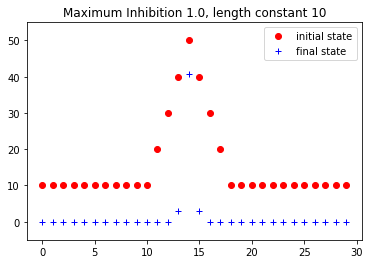

In [126]:
# plot initial state
y = initial_state_vector
x = range(dim)
plt.plot(x,y, 'o',color="red", label="initial state")
plt.legend(numpoints=1)

# plot final state
y = state_vector
x = range(dim)
plt.plot(x,y, '+',color="blue", label="final state")
plt.legend(numpoints=1)
plt.ylim(-5,55)
plt.title("Maximum Inhibition 1.0, length constant 10")
plt.show()

## Twin Peaks 

In [178]:
# Initialize initial_state_vector
initial_state_vector = np.zeros((dim,1))
distMatrix = buildDistMatrix(dim)
weightMatrix = np.zeros((dim,dim))

max_ = 40
min_ = 10
stepsaway = 3
increasing = 10

for i in range(int((halfdim-stepsaway-1)/2)):
    initial_state_vector[i,0] = min_
for i in range(int((halfdim-stepsaway-1)/2), halfdim-stepsaway):
    increasing = increasing + (max_ - min_)/ stepsaway
    initial_state_vector[i,0] = increasing
initial_state_vector[int(halfdim/2),0] = max_
increasing = max_  # PEAK ONE
for i in range(int(halfdim/2+1), int(halfdim/2) + stepsaway):
    increasing = increasing - ((max_ - min_)/ stepsaway)
    initial_state_vector[i,0] = increasing
increasing = 10 
initial_state_vector[int(halfdim/2)+stepsaway] =increasing
initial_state_vector[int(halfdim/2)+stepsaway + 1] =increasing
for i in range(int(halfdim/2)+stepsaway+2,halfdim):
    increasing = increasing + ((max_ - min_)/ stepsaway)
    initial_state_vector[i,0] = increasing
initial_state_vector[halfdim,0] = max_ + 10
increasing = max_  # PEAK TWO
for i in range(halfdim+1, halfdim+1 + stepsaway):
    increasing = increasing - ((max_ - min_)/ stepsaway)
    initial_state_vector[i,0] = increasing
for i in range(halfdim+1 +stepsaway,dim):
    initial_state_vector[i,0] = min_

state_vector = np.copy(initial_state_vector)

In [179]:
# Convert distMatrix into weightMatrix
for i in range(dim):
    for j in range(dim):
        dist = distMatrix[i,j]
        weightMatrix[i,j] = -(max_inhibition*np.exp(-(dist/length_constant)))
        if i == j:
            weightMatrix[i,j] = 0
        
        
for t in range(discrete_time_units):
    state_vector_copy = np.copy(state_vector)
    for i in range(dim):
        Sigma = 0
        for j in range(dim):
            eachsum = weightMatrix[j,i] * state_vector_copy[j,0]
            Sigma = Sigma + eachsum
        Sigma = Sigma + initial_state_vector[i,0] - state_vector_copy[i,0]
        state_vector[i,0] = state_vector[i,0] + epsilon * Sigma
    inhibited = inhibit(state_vector, dim, lower_limit, upper_limit)
    state_vector = inhibited
    

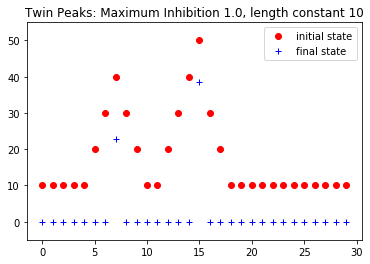

In [181]:
# plot initial state
y = initial_state_vector
x = range(dim)
plt.plot(x,y, 'o',color="red", label="initial state")
plt.legend(numpoints=1)

# plot final state
y = state_vector
x = range(dim)
plt.plot(x,y, '+',color="blue", label="final state")
plt.legend(numpoints=1)
plt.ylim(-5,55)
plt.title("Twin Peaks: Maximum Inhibition 1.0, length constant 10")
plt.show()

## Twin Peaks, Increased Lateral Inhibition


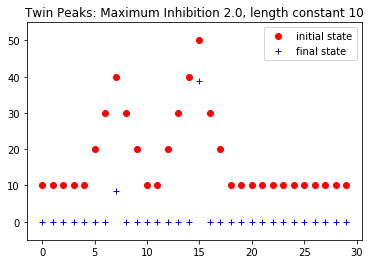

In [186]:
max_inhibition = 2.0

# Initialize initial_state_vector
initial_state_vector = np.zeros((dim,1))
distMatrix = buildDistMatrix(dim)
weightMatrix = np.zeros((dim,dim))

max_ = 40
min_ = 10
stepsaway = 3
increasing = 10

for i in range(int((halfdim-stepsaway-1)/2)):
    initial_state_vector[i,0] = min_
for i in range(int((halfdim-stepsaway-1)/2), halfdim-stepsaway):
    increasing = increasing + (max_ - min_)/ stepsaway
    initial_state_vector[i,0] = increasing
initial_state_vector[int(halfdim/2),0] = max_
increasing = max_  # PEAK ONE
for i in range(int(halfdim/2+1), int(halfdim/2) + stepsaway):
    increasing = increasing - ((max_ - min_)/ stepsaway)
    initial_state_vector[i,0] = increasing
increasing = 10 
initial_state_vector[int(halfdim/2)+stepsaway] =increasing
initial_state_vector[int(halfdim/2)+stepsaway + 1] =increasing
for i in range(int(halfdim/2)+stepsaway+2,halfdim):
    increasing = increasing + ((max_ - min_)/ stepsaway)
    initial_state_vector[i,0] = increasing
initial_state_vector[halfdim,0] = max_ + 10
increasing = max_  # PEAK TWO
for i in range(halfdim+1, halfdim+1 + stepsaway):
    increasing = increasing - ((max_ - min_)/ stepsaway)
    initial_state_vector[i,0] = increasing
for i in range(halfdim+1 +stepsaway,dim):
    initial_state_vector[i,0] = min_

state_vector = np.copy(initial_state_vector)

# Convert distMatrix into weightMatrix
for i in range(dim):
    for j in range(dim):
        dist = distMatrix[i,j]
        weightMatrix[i,j] = -(max_inhibition*np.exp(-(dist/length_constant)))
        if i == j:
            weightMatrix[i,j] = 0
        
        
for t in range(discrete_time_units):
    state_vector_copy = np.copy(state_vector)
    for i in range(dim):
        Sigma = 0
        for j in range(dim):
            eachsum = weightMatrix[j,i] * state_vector_copy[j,0]
            Sigma = Sigma + eachsum
        Sigma = Sigma + initial_state_vector[i,0] - state_vector_copy[i,0]
        state_vector[i,0] = state_vector[i,0] + epsilon * Sigma
    inhibited = inhibit(state_vector, dim, lower_limit, upper_limit)
    state_vector = inhibited
    
# plot initial state
y = initial_state_vector
x = range(dim)
plt.plot(x,y, 'o',color="red", label="initial state")
plt.legend(numpoints=1)

# plot final state
y = state_vector
x = range(dim)
plt.plot(x,y, '+',color="blue", label="final state")
plt.legend(numpoints=1)
plt.ylim(-5,55)
plt.title("Twin Peaks: Maximum Inhibition 2.0, length constant 10")
plt.show()